In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('./mtcars.csv')

In [ ]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
# 행, 열 개수
df.shape
# 32행 12열

(32, 12)

In [ ]:
# 컬럼명 확인
df.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

# 컬럼명 변경
df.rename(columns = {'Unnamed: 0' : 'car'}, inplace = True)
df.head()

In [ ]:
# 컬럼의 대략적인 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
# 컬럼 데이터타입
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [ ]:
# 숫자 값들의 통계 정보
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
# 기어, 트랜스미션 값 수 세기
print(df['gear'].value_counts())
print(df['am'].value_counts())

gear
3    15
4    12
5     5
Name: count, dtype: int64
am
0    19
1    13
Name: count, dtype: int64


In [ ]:
# 기어, 트랜스미션 조합에 따른 자동차 수 - pandas.crosstab
count_df_1 = pd.crosstab(df['gear'], df['am'])
count_df_1

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [ ]:
# 기어, 트랜스미션 조합에 따른 자동차 수 - groupby
count_df = df.groupby(['gear', 'am']).size().reset_index(name='count')
count_df

,gear,am,count
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


In [ ]:
# 기어, 트랜스미션 조합 컬럼 만들기
count_df['g&a'] = "(" + count_df['gear'].map(str) + ", " + count_df['am'].map(str) + ")"
count_df

,gear,am,count,g&a
0,3,0,15,"(3, 0)"
1,4,0,4,"(4, 0)"
2,4,1,8,"(4, 1)"
3,5,1,5,"(5, 1)"


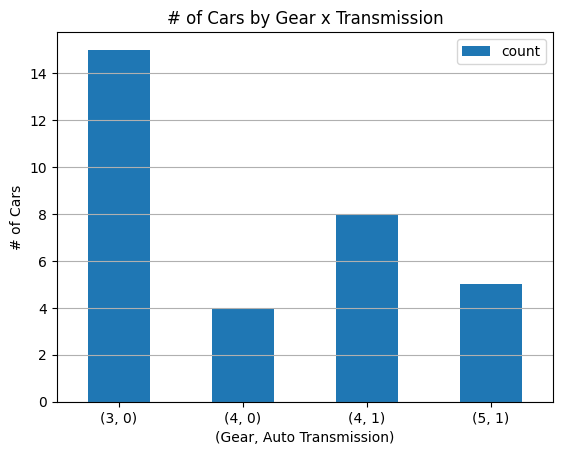

In [ ]:
# 바 그래프
ax = count_df.plot.bar(x='g&a', y='count', rot=0)
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars')
plt.title('# of Cars by Gear x Transmission')
plt.grid(True, axis='y')
plt.show()

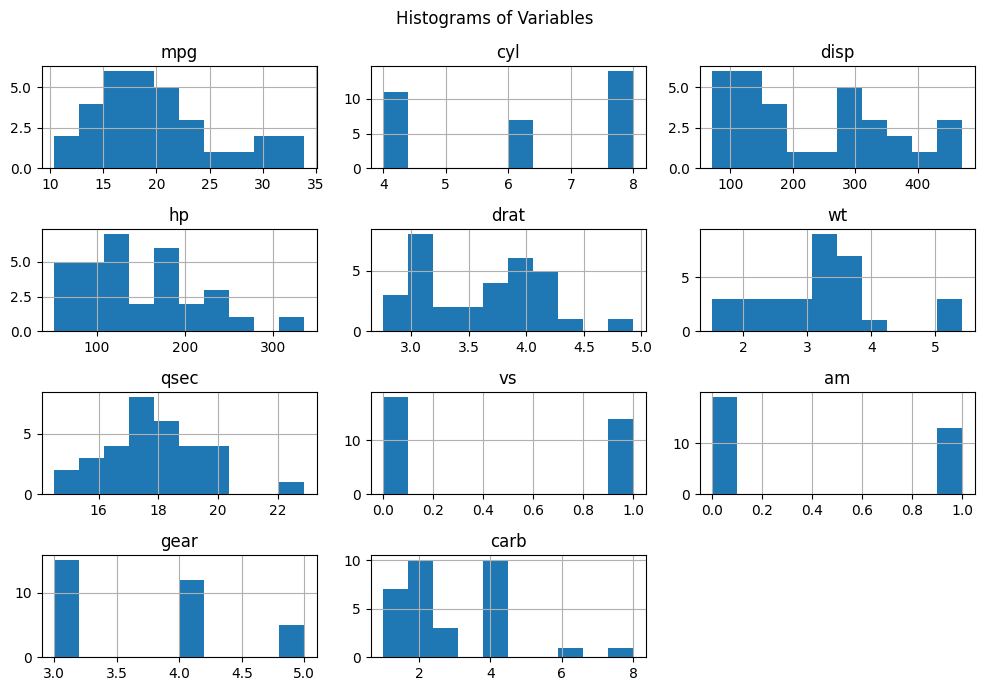

In [ ]:
# 히스토그램
num_cols = 3
num_features = len(df.columns[1:])
num_rows = (num_features // num_cols) + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 7))
fig.suptitle('Histograms of Variables') 

axes = axes.flatten()

for i, column in enumerate(df.columns[1:]):
    ax = axes[i]
    ax.hist(df[column].dropna())
    ax.set_title(column)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout(rect=[0, 0, 1, 1])

plt.show()


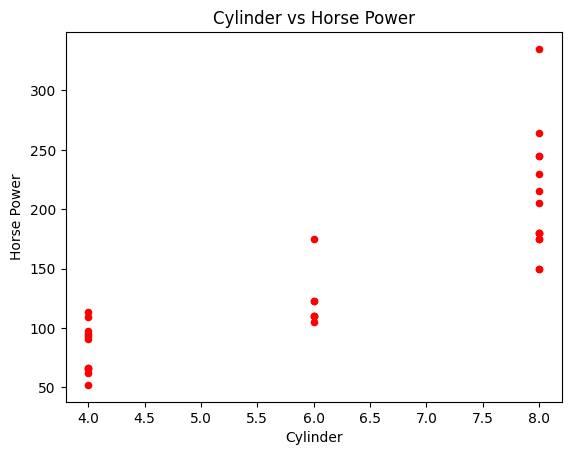

In [ ]:
# scatter 차트
ax_scatter = df.plot.scatter(x='cyl', y='hp', c='r')
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.title('Cylinder vs Horse Power')
# plt.grid(True)
plt.show()

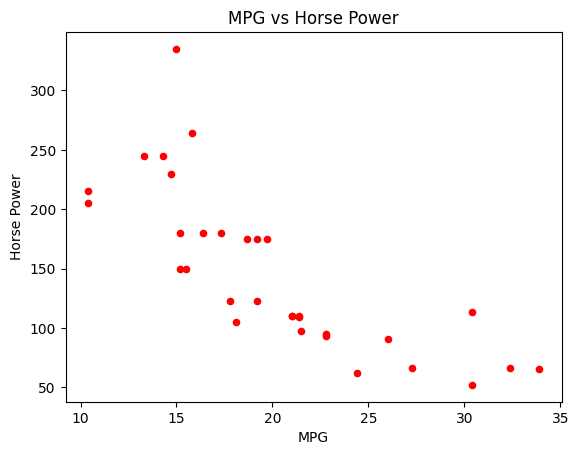

In [ ]:
# scatter 차트
ax_scatter = df.plot.scatter(x='mpg', y='hp', c='r')
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.title('MPG vs Horse Power')
# plt.grid(True)
plt.show()

In [ ]:
# 변수들 간의 상관관계 표
df_corr = df.loc[:, df.columns != 'car']
df_corr.corr().style.background_gradient(cmap='YlOrRd')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


# 절대값 0.8 이상

### cyl - disp = 0.902033
* 실린더 수가 많으면 배기량 up
### cyl - hp = 0.832447
* 실린더 수가 많으면 마력이 up
### wt - disp = 0.887980
* 차량의 무게가 무거울수록 배기량 up

----------------------
----------------------

### wt <> mpg = -0.867659
* 차량의 무게가 무거울수록 연비 down
### cyl <> mpg = -0.852162
* 실린더 수가 많을수록 연비 down
### disp <> mpg = -0.847551 
* 실린더 수가 많으면 배기량 up -> 배기량 많으면 연비 down (위와 같은 논리)
